Dataset loaded successfully!

Shape of the dataset (rows, columns):
(7043, 21)

Column names:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Data types:
customerID              str
gender                  str
SeniorCitizen         int64
Partner                 str
Dependents              str
tenure                int64
PhoneService            str
MultipleLines           str
InternetService         str
OnlineSecurity          str
OnlineBackup            str
DeviceProtection        str
TechSupport             str
StreamingTV             str
StreamingMovies         str
Contract                str
PaperlessBilling        str
PaymentMethod           str
MonthlyCharges      float64
TotalCharges            str
Churn    

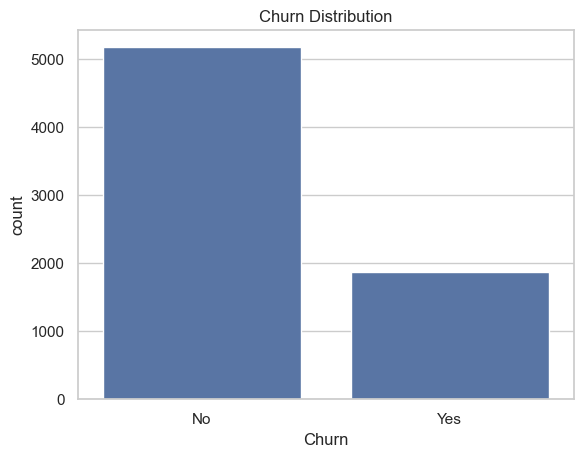

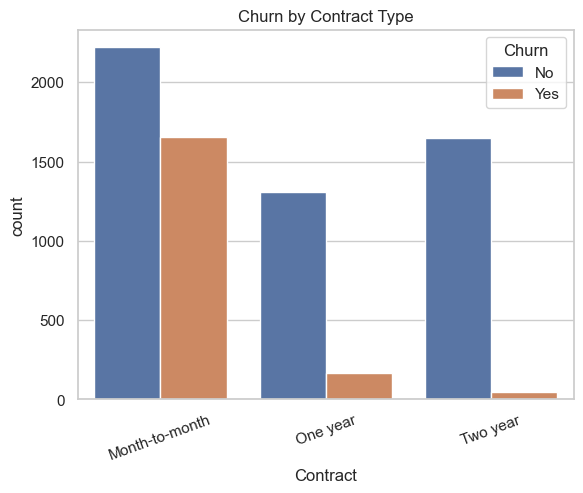

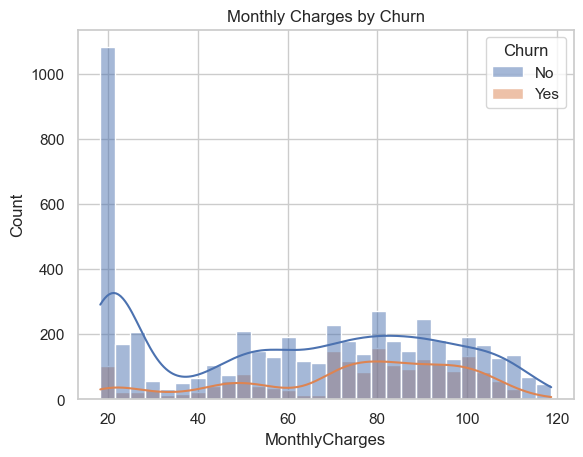

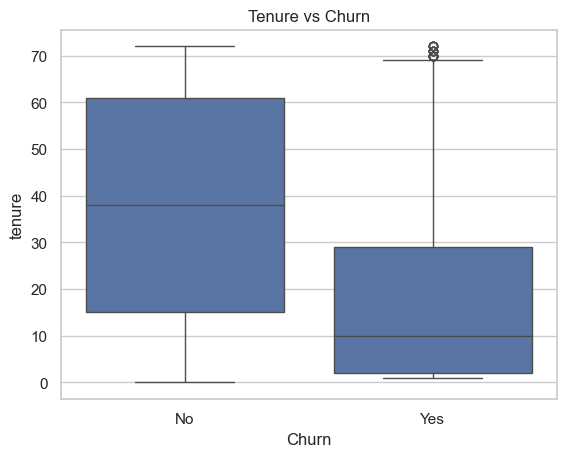


Numerical feature summary:
            tenure  MonthlyCharges  TotalCharges
count  7043.000000     7043.000000   7032.000000
mean     32.371149       64.761692   2283.300441
std      24.559481       30.090047   2266.771362
min       0.000000       18.250000     18.800000
25%       9.000000       35.500000    401.450000
50%      29.000000       70.350000   1397.475000
75%      55.000000       89.850000   3794.737500
max      72.000000      118.750000   8684.800000


In [3]:
# Telco Customer Churn – Data Loading & Exploration

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# -----------------------------
# 1. Load the dataset
# -----------------------------

# Set up paths
DATA_DIR = Path("data")
CSV_FILE = DATA_DIR / "Telco-Customer-Churn.csv"
df = pd.read_csv(CSV_FILE)

print("Dataset loaded successfully!")

# -----------------------------
# 2. Basic dataset exploration
# -----------------------------
print("\nShape of the dataset (rows, columns):")
print(df.shape)

print("\nColumn names:")
print(df.columns.tolist())

print("\nData types:")
print(df.dtypes)

print("\nMissing values per column:")
print(df.isna().sum())

# -----------------------------
# 3. Target variable distribution
# -----------------------------
print("\nChurn distribution:")
print(df["Churn"].value_counts())
print("\nChurn distribution (percentage):")
print(df["Churn"].value_counts(normalize=True) * 100)

# -----------------------------
# 4. Basic data cleaning for analysis
# -----------------------------
# TotalCharges sometimes comes as string with spaces
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

print("\nMissing values after cleaning TotalCharges:")
print(df.isna().sum())

# -----------------------------
# 5. Visualizations
# -----------------------------
sns.set(style="whitegrid")

# Churn distribution
plt.figure()
sns.countplot(data=df, x="Churn")
plt.title("Churn Distribution")
plt.show()

# Churn by contract type
plt.figure()
sns.countplot(data=df, x="Contract", hue="Churn")
plt.title("Churn by Contract Type")
plt.xticks(rotation=20)
plt.show()

# Monthly charges distribution by churn
plt.figure()
sns.histplot(data=df, x="MonthlyCharges", hue="Churn", bins=30, kde=True)
plt.title("Monthly Charges by Churn")
plt.show()

# Tenure vs churn
plt.figure()
sns.boxplot(data=df, x="Churn", y="tenure")
plt.title("Tenure vs Churn")
plt.show()

# -----------------------------
# 6. Quick summary stats
# -----------------------------
print("\nNumerical feature summary:")
print(df[["tenure", "MonthlyCharges", "TotalCharges"]].describe())


In [4]:
# -----------------------------
# Step 2: Data Preprocessing
# -----------------------------

# 1) Handle missing values (if any)
# TotalCharges was coerced to numeric above; any NaNs created there can be handled now.
# We'll fill numeric NaNs with the median (robust choice).
num_cols = df.select_dtypes(include=["number"]).columns
for col in num_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].median())

# For categorical columns, fill missing with the most frequent value (mode)
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    if df[col].isna().any():
        df[col] = df[col].fillna(df[col].mode()[0])

print("\nMissing values after preprocessing:")
print(df.isna().sum().sort_values(ascending=False).head(10))

# 2) Select relevant features for modeling
# customerID is an identifier, not useful as a predictive feature.
df_model = df.drop(columns=["customerID"], errors="ignore")

# 3) Separate features (X) from target (y)
X = df_model.drop(columns=["Churn"])
y = df_model["Churn"]

# 4) Convert target to binary (0/1) if needed
# Original values are typically "Yes"/"No"
y = y.map({"No": 0, "Yes": 1}).astype(int)

print("\nTarget (y) sample after binary mapping:")
print(y.head())
print("Target distribution (0=No churn, 1=Churn):")
print(y.value_counts())

# 5) Convert categorical variables to numeric (encoding)
# Identify categorical columns in X
X_cat_cols = X.select_dtypes(include=["object"]).columns

# One-hot encode categorical variables
X_encoded = pd.get_dummies(X, columns=X_cat_cols, drop_first=True)

print("\nFeature matrix after encoding:")
print("X_encoded shape:", X_encoded.shape)
print("Example encoded columns:", X_encoded.columns[:15].tolist())

# (Optional) Quick sanity checks
print("\nAny remaining NaNs in X_encoded?", X_encoded.isna().any().any())
print("X_encoded preview:")
print(X_encoded.head(3))



Missing values after preprocessing:
customerID         0
gender             0
SeniorCitizen      0
Partner            0
Dependents         0
tenure             0
PhoneService       0
MultipleLines      0
InternetService    0
OnlineSecurity     0
dtype: int64

Target (y) sample after binary mapping:
0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64
Target distribution (0=No churn, 1=Churn):
Churn
0    5174
1    1869
Name: count, dtype: int64

Feature matrix after encoding:
X_encoded shape: (7043, 30)
Example encoded columns: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service']

Any remaining NaNs in X_encoded? False
X_encoded preview:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Ma

/var/folders/m9/k3904p616cvg53z97mbf8sfc0000gn/T/ipykernel_88352/663866235.py:14: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include=["object"]).columns
/var/folders/m9/k3904p616cvg53z97mbf8sfc0000gn/T/ipykernel_88352/663866235.py:41: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pan

In [5]:
# -----------------------------
# Step 3: Train / Test Split
# -----------------------------
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,          # 20% test set
    stratify=y,             # preserve churn distribution
    random_state=42         # reproducibility
)

print("Train / test split completed!")

print("\nShapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test:  {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test:  {y_test.shape}")

print("\nTarget distribution check:")
print("Train set:")
print(y_train.value_counts(normalize=True))
print("\nTest set:")
print(y_test.value_counts(normalize=True))


Train / test split completed!

Shapes:
X_train: (5634, 30)
X_test:  (1409, 30)
y_train: (5634,)
y_test:  (1409,)

Target distribution check:
Train set:
Churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64

Test set:
Churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [6]:
# -----------------------------
# Step 4: KNN Classifier
# -----------------------------
from sklearn.neighbors import KNeighborsClassifier

# Create the KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

print("KNN classifier trained successfully!")
print(f"Number of neighbors (k): {knn.n_neighbors}")


KNN classifier trained successfully!
Number of neighbors (k): 5


Model performance (Test set):
Accuracy : 0.7658
Precision: 0.5791
Recall   : 0.4305


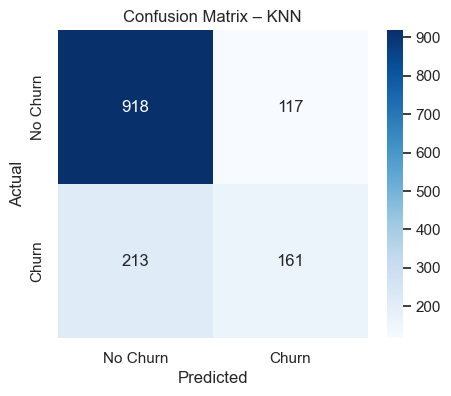


Classification Report:
              precision    recall  f1-score   support

    No Churn       0.81      0.89      0.85      1035
       Churn       0.58      0.43      0.49       374

    accuracy                           0.77      1409
   macro avg       0.70      0.66      0.67      1409
weighted avg       0.75      0.77      0.75      1409



In [7]:
# -----------------------------
# Step 5: Evaluation
# -----------------------------
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

# 1) Make predictions on the test set
y_test_pred = knn.predict(X_test)

# 2) Calculate metrics
accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)

print("Model performance (Test set):")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")

# 3) Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Churn", "Churn"],
    yticklabels=["No Churn", "Churn"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – KNN")
plt.show()

# 4) Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=["No Churn", "Churn"]))

In [8]:
# -----------------------------
# Step 6: KNN – Try different K values
# -----------------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

k_values = [1, 3, 5, 7, 9, 11, 15]
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    results.append({
        "k": k,
        "accuracy": accuracy_score(y_test, y_pred),
        "precision": precision_score(y_test, y_pred),
        "recall": recall_score(y_test, y_pred),
        "f1_score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df)


    k  accuracy  precision    recall  f1_score
0   1  0.711852   0.456989  0.454545  0.455764
1   3  0.762243   0.565657  0.449198  0.500745
2   5  0.765791   0.579137  0.430481  0.493865
3   7  0.781405   0.625954  0.438503  0.515723
4   9  0.789212   0.655870  0.433155  0.521739
5  11  0.787083   0.660870  0.406417  0.503311
6  15  0.789922   0.674107  0.403743  0.505017
